In [3]:
import pandas as pd

# Load dataset
data_path = '../data/teslafinancial_data_normalized.csv'
data = pd.read_csv(data_path, parse_dates=['Date'], index_col='Date')
# data['Date'] = pd.to_datetime(data['Date'])

# Display the dataset to confirm structure
print(data.head())


                           Adj Close     Close      High       Low       Open  \
Date                                                                            
2015-01-02 00:00:00+00:00  -0.879204 -0.879204 -0.878992 -0.880142  14.858000   
2015-01-05 00:00:00+00:00  -0.884785 -0.884785 -0.882987 -0.883924  14.303333   
2015-01-06 00:00:00+00:00  -0.884065 -0.884065 -0.884348 -0.885752  14.004000   
2015-01-07 00:00:00+00:00  -0.884265 -0.884265 -0.884005 -0.882299  14.223333   
2015-01-08 00:00:00+00:00  -0.884465 -0.884465 -0.884585 -0.882157  14.187333   

                             Volume  
Date                                 
2015-01-02 00:00:00+00:00  71466000  
2015-01-05 00:00:00+00:00  80527500  
2015-01-06 00:00:00+00:00  93928500  
2015-01-07 00:00:00+00:00  44526000  
2015-01-08 00:00:00+00:00  51637500  


In [4]:
# Split the data into train and test sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Define target column
target_column = 'Adj Close'


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization

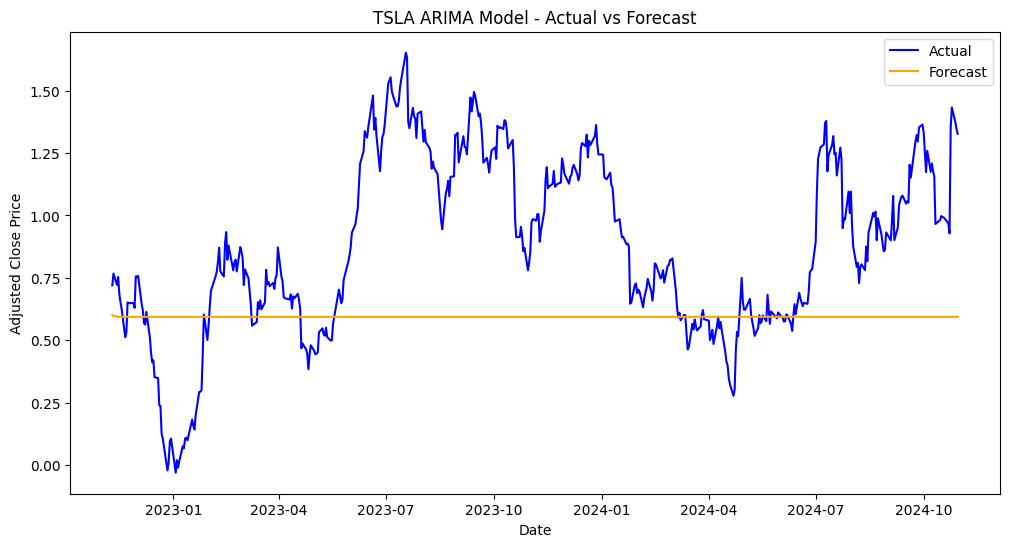

ARIMA Model Evaluation: MAE = 0.3570061539798234, RMSE = 0.450113202711123, MAPE = nan%


C:\Users\User\AppData\Local\Temp\ipykernel_35136\373042772.py:30: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((test[target_column] - forecast) / test[target_column])) * 100


In [5]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

# Set ARIMA order (p, d, q) - or use auto_arima for automation
p, d, q = 5, 1, 0  # Initial guess; you may refine these with auto_arima

# Train ARIMA model
model = ARIMA(train[target_column], order=(p, d, q))
model_fit = model.fit()

# Forecast on test data
forecast = model_fit.forecast(steps=len(test))

# Plot actual vs forecast
plt.figure(figsize=(12, 6))
plt.plot(test.index, test[target_column], label='Actual', color='blue')
plt.plot(test.index, forecast, label='Forecast', color='orange')
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.legend()
plt.title(f"TSLA ARIMA Model - Actual vs Forecast")
plt.show()

# Evaluation
mae = mean_absolute_error(test[target_column], forecast)
rmse = sqrt(mean_squared_error(test[target_column], forecast))
mape = np.mean(np.abs((test[target_column] - forecast) / test[target_column])) * 100

print(f"ARIMA Model Evaluation: MAE = {mae}, RMSE = {rmse}, MAPE = {mape}%")


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-6258.329, Time=2.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6258.541, Time=0.46 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6259.578, Time=0.54 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6259.473, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6260.093, Time=0.13 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.600 seconds
Best ARIMA parameters: (0, 1, 0)


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is availab

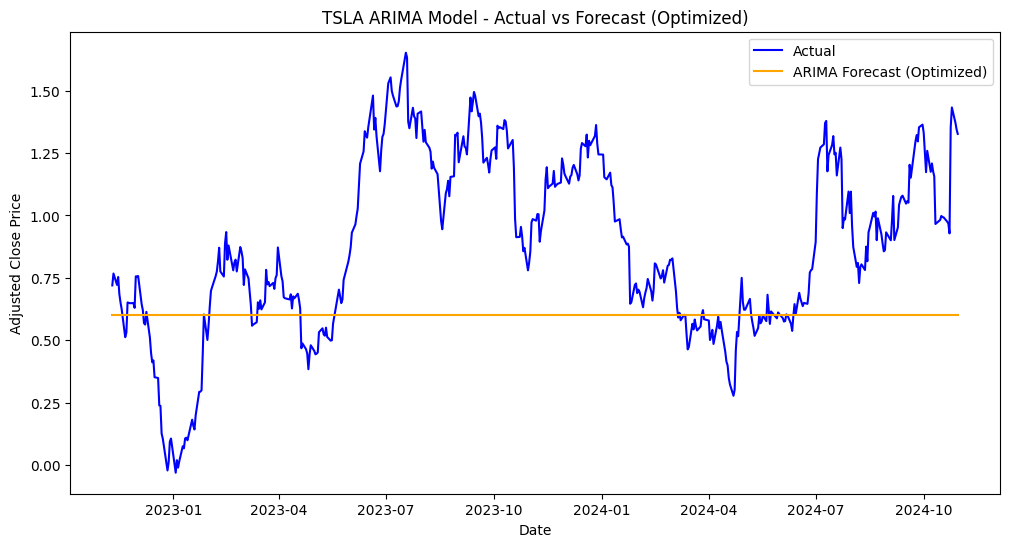

Optimized ARIMA Model Evaluation: MAE = 0.3533136003079327, RMSE = 0.44599338333759353, MAPE = nan%


C:\Users\User\AppData\Local\Temp\ipykernel_35136\1674026884.py:39: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((test[target_column] - forecast) / test[target_column])) * 100


In [7]:
from pmdarima import auto_arima
import matplotlib.pyplot as plt

# Use auto_arima to find the best (p, d, q) values
stepwise_model = auto_arima(train[target_column], 
                            start_p=1, start_q=1,
                            max_p=5, max_q=5, 
                            m=1,            # no seasonality
                            d=None,         # let auto_arima find the optimal 'd'
                            seasonal=False, # for ARIMA (set to True if using SARIMA)
                            trace=True, 
                            error_action='ignore', 
                            suppress_warnings=True, 
                            stepwise=True)

# Print the chosen model parameters
print("Best ARIMA parameters:", stepwise_model.order)

# Fit the best model
model = ARIMA(train[target_column], order=stepwise_model.order)
model_fit = model.fit()

# Forecast on the test set
forecast = model_fit.forecast(steps=len(test))

# Plot actual vs forecast
plt.figure(figsize=(12, 6))
plt.plot(test.index, test[target_column], label='Actual', color='blue')
plt.plot(test.index, forecast, label='ARIMA Forecast (Optimized)', color='orange')
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.legend()
plt.title(f"TSLA ARIMA Model - Actual vs Forecast (Optimized)")
plt.show()

# Evaluation
mae = mean_absolute_error(test[target_column], forecast)
rmse = sqrt(mean_squared_error(test[target_column], forecast))
mape = np.mean(np.abs((test[target_column] - forecast) / test[target_column])) * 100

print(f"Optimized ARIMA Model Evaluation: MAE = {mae}, RMSE = {rmse}, MAPE = {mape}%")


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=-6257.699, Time=3.76 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-6258.541, Time=0.44 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-6259.054, Time=2.14 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-6258.633, Time=6.96 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-6260.093, Time=0.13 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=-6258.048, Time=1.21 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=-6257.736, Time=2.52 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-6265.399, Time=7.08 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=-6288.250, Time=19.53 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=-6290.241, Time=7.31 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=-6290.953, Time=8.96 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=-6288.953, Time=24.99 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=-6266.108, Time=10.14 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=-6290.078, Time=11.51 sec
 

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


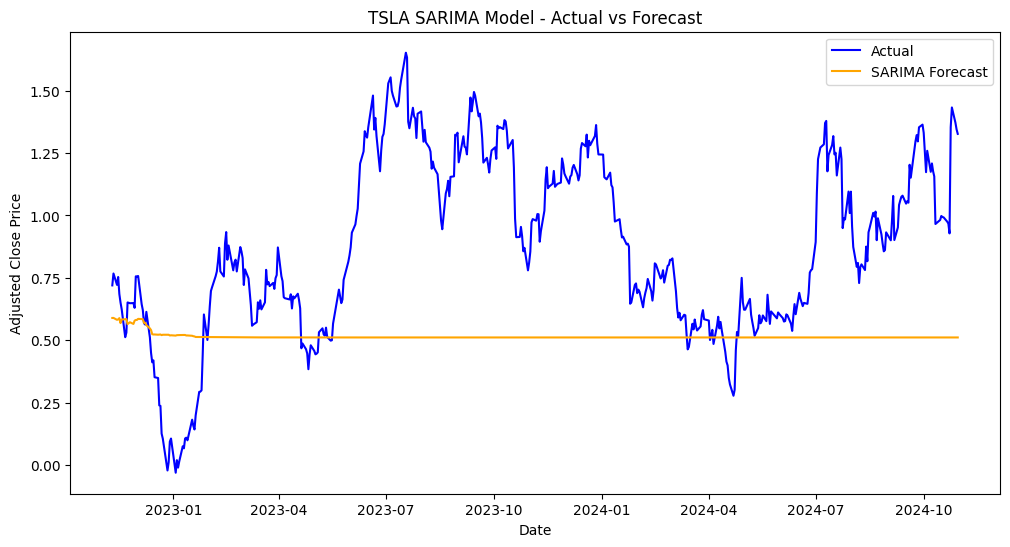

SARIMA Model Evaluation: MAE = 0.41126547583641987, RMSE = 0.5057234305295927, MAPE = nan%


C:\Users\User\AppData\Local\Temp\ipykernel_35136\94736813.py:27: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((test[target_column] - sarima_forecast) / test[target_column])) * 100


In [8]:
from pmdarima import auto_arima

# Using auto_arima to determine best SARIMA parameters
stepwise_model = auto_arima(train[target_column], start_p=1, start_q=1,
                            max_p=3, max_q=3, m=12,  # monthly seasonality as an example
                            start_P=0, seasonal=True, trace=True,
                            error_action='ignore', suppress_warnings=True)

print(stepwise_model.summary())

# Forecast using SARIMA
sarima_forecast = stepwise_model.predict(n_periods=len(test))

# Plot SARIMA results
plt.figure(figsize=(12, 6))
plt.plot(test.index, test[target_column], label='Actual', color='blue')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', color='orange')
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.legend()
plt.title("TSLA SARIMA Model - Actual vs Forecast")
plt.show()

# Evaluation
mae = mean_absolute_error(test[target_column], sarima_forecast)
rmse = sqrt(mean_squared_error(test[target_column], sarima_forecast))
mape = np.mean(np.abs((test[target_column] - sarima_forecast) / test[target_column])) * 100

print(f"SARIMA Model Evaluation: MAE = {mae}, RMSE = {rmse}, MAPE = {mape}%")


Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


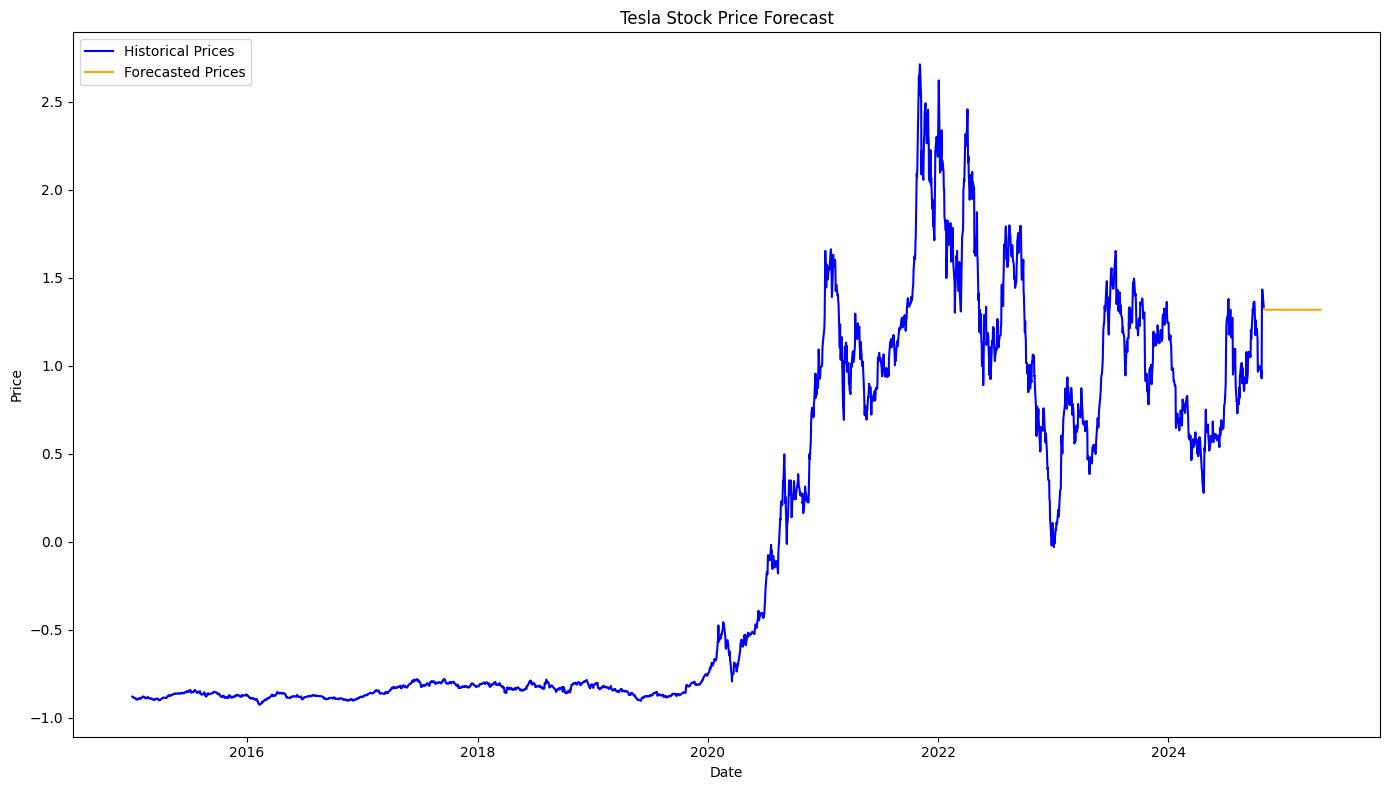

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
data = pd.read_csv('../data/teslafinancial_data_normalized.csv')

# Check the column names to confirm 'Date' exists and is properly formatted
print(data.columns)

# Ensure 'Date' is in datetime format
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])
else:
    raise ValueError("Date column is missing or incorrectly named.")

# Fit the ARIMA model to the 'Adj Close' price data
model = ARIMA(data['Adj Close'], order=(5, 1, 0))  # Adjust (p, d, q) as necessary
model_fit = model.fit()

# Forecast the next 'forecast_horizon' steps (e.g., 180 days)
forecast_horizon = 180
forecast_values = model_fit.forecast(steps=forecast_horizon)

# Create a date range for the forecasted period
last_date = data['Date'].iloc[-1]
forecast_dates = pd.date_range(last_date + timedelta(days=1), periods=forecast_horizon, freq='D')

# Plot the historical and forecasted prices
plt.figure(figsize=(14, 8))
plt.plot(data['Date'], data['Adj Close'], label='Historical Prices', color='blue')
plt.plot(forecast_dates, forecast_values, label='Forecasted Prices', color='orange')

plt.title('Tesla Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you've already forecasted TSLA, BND, and SPY for the future period
# Example forecasted data (adjust this with actual forecast values)
forecast_dates = pd.date_range(start="2024-11-12", periods=180, freq='D')  # example 6-month period
TSLA_forecast = np.random.normal(loc=200, scale=15, size=180)  # Replace with your TSLA forecast values
BND_forecast = np.random.normal(loc=100, scale=2, size=180)  # Replace with your BND forecast values
SPY_forecast = np.random.normal(loc=400, scale=20, size=180)  # Replace with your SPY forecast values

# Combine into a DataFrame
df = pd.DataFrame({
    'Date': forecast_dates,
    'TSLA': TSLA_forecast,
    'BND': BND_forecast,
    'SPY': SPY_forecast
})

df.set_index('Date', inplace=True)

# Preview the data
print(df.head())


                  TSLA         BND         SPY
Date                                          
2024-11-12  224.836226   97.516664  385.437778
2024-11-13  189.390216  101.081882  401.409574
2024-11-14  198.973946   98.713425  430.857788
2024-11-15  203.649921  101.480314  418.478198
2024-11-16  219.538108   99.100591  415.636832


In [2]:
# Calculate daily returns for each asset
df['TSLA_return'] = df['TSLA'].pct_change()
df['BND_return'] = df['BND'].pct_change()
df['SPY_return'] = df['SPY'].pct_change()

# Drop the first row as it will be NaN
df = df.dropna()

# Preview the daily returns
print(df[['TSLA_return', 'BND_return', 'SPY_return']].head())


            TSLA_return  BND_return  SPY_return
Date                                           
2024-11-13    -0.157653    0.036560    0.041438
2024-11-14     0.050603   -0.023431    0.073362
2024-11-15     0.023500    0.028030   -0.028732
2024-11-16     0.078017   -0.023450   -0.006790
2024-11-17    -0.177750    0.022435   -0.063943


In [3]:
# Calculate the annualized returns (assuming 252 trading days per year)
annualized_returns = df[['TSLA_return', 'BND_return', 'SPY_return']].mean() * 252

# Calculate the annualized volatility (standard deviation) for each asset
annualized_volatility = df[['TSLA_return', 'BND_return', 'SPY_return']].std() * np.sqrt(252)

# Display the annualized returns and volatility
print(f"Annualized Returns:\n{annualized_returns}")
print(f"Annualized Volatility:\n{annualized_volatility}")


Annualized Returns:
TSLA_return    1.293179
BND_return     0.141079
SPY_return     0.812569
dtype: float64
Annualized Volatility:
TSLA_return    1.712075
BND_return     0.432671
SPY_return     1.117784
dtype: float64


In [4]:
# Calculate the covariance matrix between the asset returns
cov_matrix = df[['TSLA_return', 'BND_return', 'SPY_return']].cov()

print("Covariance Matrix:")
print(cov_matrix)


Covariance Matrix:
             TSLA_return  BND_return  SPY_return
TSLA_return     0.011632   -0.000109    0.001338
BND_return     -0.000109    0.000743    0.000200
SPY_return      0.001338    0.000200    0.004958


In [5]:
# Define the portfolio weights (for example, equal weights)
weights = np.array([0.4, 0.3, 0.3])  # Adjust this based on your portfolio


In [6]:
from scipy.optimize import minimize

# Define a function to calculate portfolio return
def portfolio_return(weights, mean_returns):
    return np.dot(weights, mean_returns)

# Define a function to calculate portfolio volatility
def portfolio_volatility(weights, cov_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Define the objective function (negative Sharpe ratio)
def objective_function(weights, mean_returns, cov_matrix):
    port_return = portfolio_return(weights, mean_returns)
    port_volatility = portfolio_volatility(weights, cov_matrix)
    return -port_return / port_volatility  # Minimize negative Sharpe ratio

# Constraints: The sum of weights must be 1 (100%)
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Bounds for weights (between 0 and 1)
bounds = ((0, 1), (0, 1), (0, 1))

# Optimize the portfolio weights
optimal_weights = minimize(objective_function, [0.33, 0.33, 0.34], args=(annualized_returns, cov_matrix), 
                           method='SLSQP', bounds=bounds, constraints=constraints)

# Display the optimal weights
print("Optimal Portfolio Weights:")
print(optimal_weights.x)


Optimal Portfolio Weights:
[0.24585772 0.42532551 0.32881677]


In [7]:
# Get the optimal portfolio return and volatility
optimal_return = portfolio_return(optimal_weights.x, annualized_returns)
optimal_volatility = portfolio_volatility(optimal_weights.x, cov_matrix)

# Calculate the portfolio's Value at Risk (VaR) at 95% confidence interval
z_score = 1.65  # For 95% confidence interval
VaR = optimal_volatility * z_score

# Display the results
print(f"Optimal Portfolio Return: {optimal_return}")
print(f"Optimal Portfolio Volatility: {optimal_volatility}")
print(f"Portfolio Value at Risk (VaR) at 95% confidence: {VaR}")


Optimal Portfolio Return: 0.6451285736211105
Optimal Portfolio Volatility: 0.04028605334715336
Portfolio Value at Risk (VaR) at 95% confidence: 0.06647198802280303


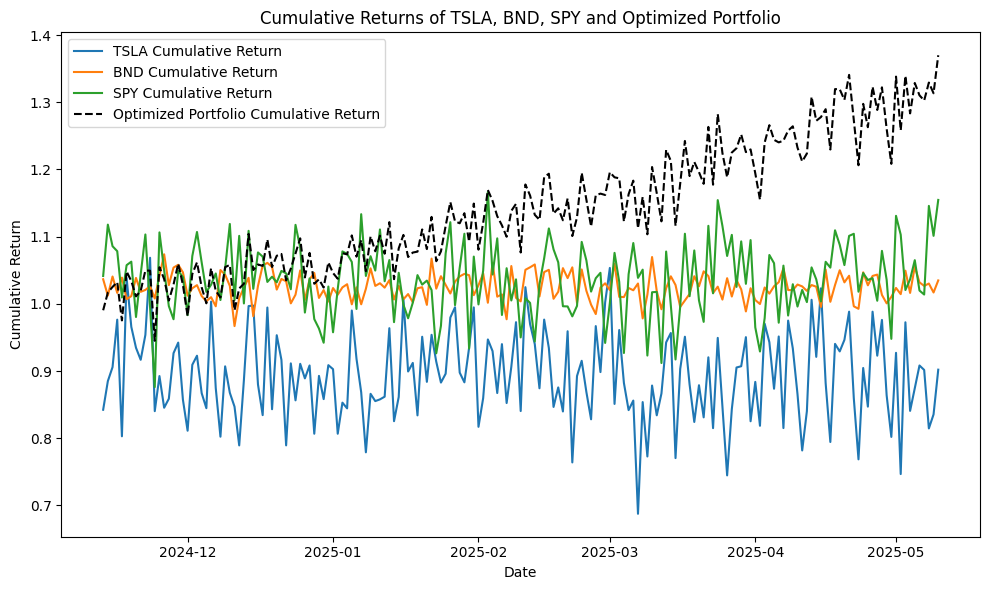

In [8]:
# Calculate cumulative returns for each asset and portfolio
df['TSLA_cumulative'] = (1 + df['TSLA_return']).cumprod()
df['BND_cumulative'] = (1 + df['BND_return']).cumprod()
df['SPY_cumulative'] = (1 + df['SPY_return']).cumprod()

# Portfolio cumulative return (weighted average)
df['portfolio_return'] = df['TSLA_return'] * optimal_weights.x[0] + df['BND_return'] * optimal_weights.x[1] + df['SPY_return'] * optimal_weights.x[2]
df['portfolio_cumulative'] = (1 + df['portfolio_return']).cumprod()

# Plot the cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['TSLA_cumulative'], label='TSLA Cumulative Return')
plt.plot(df.index, df['BND_cumulative'], label='BND Cumulative Return')
plt.plot(df.index, df['SPY_cumulative'], label='SPY Cumulative Return')
plt.plot(df.index, df['portfolio_cumulative'], label='Optimized Portfolio Cumulative Return', color='black', linestyle='--')

plt.title('Cumulative Returns of TSLA, BND, SPY and Optimized Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.tight_layout()
plt.show()
